In [1]:
import dc_stat_think as dcst

In [2]:
import pandas as pd

In [19]:
df= pd.read_csv('../../data/gandhi_et_al_bouts.csv' ,skiprows = 4 )

In [20]:
df.columns

Index(['genotype', 'bout_length', 'fish'], dtype='object')

In [26]:
bout_lengths_wt = df[df['genotype'] == 'wt' ].bout_length.values

In [27]:
bout_lengths_wt.shape

(1409,)

In [28]:
bout_lengths_mut = df[df['genotype'] == 'mut' ].bout_length.values

bout_lengths_mut.shape

(1352,)

In [30]:
import matplotlib.pyplot as plt
import numpy as np

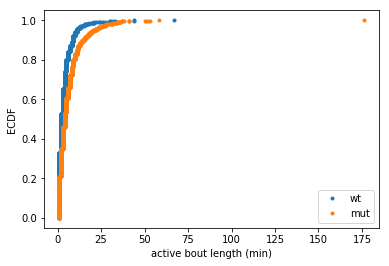

In [31]:
# Import the dc_stat_think module as dcst
import dc_stat_think as dcst

# Generate x and y values for plotting ECDFs
x_wt, y_wt = dcst.ecdf(bout_lengths_wt)
x_mut, y_mut = dcst.ecdf( bout_lengths_mut )

# Plot the ECDFs
_ = plt.plot(x_wt, y_wt, marker='.', linestyle='none')
_ = plt.plot(x_mut, y_mut, marker='.', linestyle='none')

# Make a legend, label axes, and show plot
_ = plt.legend(('wt', 'mut'))
_ = plt.xlabel('active bout length (min)')
_ = plt.ylabel('ECDF')
plt.show()


There is an outlier of one active bout for a mutant fish, and the ECDF exposes this clearly. It is important to know about, but we will not focus on it going forward, though.

Interpreting ECDFs and the story

While a more detailed analysis of distributions is often warranted for careful analyses, you can already get a feel for the distributions and the story behind the data by eyeballing the ECDFs. Which of the following would be the most reasonable statement to make about how the active bout lengths are distributed and what kind of process might be behind exiting the active bout to rest?

If you need a refresher, here are videos from Statistical Thinking I about stories behind probability distributions.

    Discrete Uniform and Binomial
    Poisson processes and Poisson distribution
    Normal distribution
    Exponential Distribution

Instructions
50 XP
Possible Answers

    The bout lengths appear Normally distributed, which implies that the fish tend to have a set bout length.
    The bout lengths appear Exponentially distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.
    The bout lengths appear Poisson distributed, which implies that exiting an active bout to rest is a Poisson process; the fish have no apparent memory about when they became active.

While not exactly Exponentially distributed, the ECDF has no left tail, and no discernible inflection point, which is very much like the Exponential CDF.

**If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval**

In [32]:
# Compute mean active bout length
mean_wt = np.mean(bout_lengths_wt)
mean_mut = np.mean(bout_lengths_mut)

# Draw bootstrap replicates
bs_reps_wt = dcst.draw_bs_reps( bout_lengths_wt  , np.mean, size=10000)
bs_reps_mut = dcst.draw_bs_reps( bout_lengths_mut  , np.mean, size=10000)
# Compute 95% confidence intervals
conf_int_wt = np.percentile(bs_reps_wt, [2.5, 97.5])
conf_int_mut = np.percentile(bs_reps_mut, [2.5, 97.5])

# Print the results
print("""
wt:  mean = {0:.3f} min., conf. int. = [{1:.1f}, {2:.1f}] min.
mut: mean = {3:.3f} min., conf. int. = [{4:.1f}, {5:.1f}] min.
""".format(mean_wt, *conf_int_wt, mean_mut, *conf_int_mut))


wt:  mean = 3.874 min., conf. int. = [3.6, 4.1] min.
mut: mean = 6.543 min., conf. int. = [6.1, 7.0] min.



Permutation test: wild type versus heterozygote

Test the hypothesis that the heterozygote and wild type bout lengths are identically distributed using a permutation test.

In [33]:
bout_lengths_het =  df[df['genotype'] == 'het' ].bout_length.values

In [34]:
# Compute the difference of means: diff_means_exp
diff_means_exp = np.mean(bout_lengths_het) - np.mean(bout_lengths_wt)

# Draw permutation replicates: perm_reps
perm_reps = dcst.draw_perm_reps(bout_lengths_het, bout_lengths_wt, 
                               dcst.diff_of_means, size=10000)

# Compute the p-value: p-val
p_val = np.sum(perm_reps >= diff_means_exp) / len(perm_reps)

# Print the result
print('p =', p_val)

p = 0.0012


 A p-value of 0.001 suggests that the observed difference in means is unlikely to occur if heterozygotic and wild type fish have active bout lengths that are identically distributed.

Bootstrap hypothesis test

The permutation test has a pretty restrictive hypothesis, that the heterozygotic and wild type bout lengths are identically distributed. Now, use a bootstrap hypothesis test to test the hypothesis that the means are equal, making no assumptions about the distributions.

In [35]:
# Concatenate arrays: bout_lengths_concat
bout_lengths_concat = np.concatenate((bout_lengths_wt, bout_lengths_het))

# Compute mean of all bout_lengths: mean_bout_length
mean_bout_length = np.mean( bout_lengths_concat )

# Generate shifted arrays
wt_shifted = bout_lengths_wt - np.mean(bout_lengths_wt) + mean_bout_length
het_shifted = bout_lengths_het - np.mean(bout_lengths_het) + mean_bout_length

# Compute 10,000 bootstrap replicates from shifted arrays
bs_reps_wt = dcst.draw_bs_reps(wt_shifted , np.mean , size =10000)
bs_reps_het = dcst.draw_bs_reps(het_shifted , np.mean , size =10000)

# Get replicates of difference of means: bs_replicates
bs_reps = bs_reps_het - bs_reps_wt

# Compute and print p-value: p
p = np.sum(bs_reps >= diff_means_exp) / len(bs_reps)
print('p-value =', p)

p-value = 0.0004


 We get a result of similar magnitude as the permutation test, though slightly smaller, probably because the heterozygote bout length distribution has a heavier tail to the right.

In [36]:
t = [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 ]

bac_area = [  5.574735  ,   5.71202325,   5.90339475,   6.19461225,
         6.456708  ,   6.85193175,   7.17643125,   7.56749475,
         8.087526  ,   8.586756  ,   8.74900575,   9.48120975,
        10.03868325,  10.550394  ,  11.13698925,  11.765187  ,
        12.38506425,  13.07566575,  13.7371455 ,  14.377824  ,
        14.89785525,  15.5177325 ,  16.341462  ,  17.31912075,
        18.4132665 ,  19.5947775 ,  20.96766   ,  22.07844675,
        23.41804725,  24.6702825 ,  26.25533775,  28.00264275,
        29.6293005 ,  31.41404775,  33.31944225,  35.59925925,
        37.974762  ,  40.787091  ,  43.749189  ,  46.8028125 ,
        50.28494175,  53.467533  ,  57.644424  ,  61.438572  ,
        64.72932975,  68.3861895 ,  71.539659  ,  75.85383825,
        81.61994475,  86.050611  ,  91.53798075,  98.231823  ,
       104.27666625, 110.862342  , 118.31751   ]

t= np.array(t)
bac_area= np.array(bac_area)


In [37]:
# Compute logarithm of the bacterial area: log_bac_area
log_bac_area = np.log( bac_area )

# Compute the slope and intercept: growth_rate, log_a0
growth_rate, log_a0 = np.polyfit(t, log_bac_area , 1  )

# Draw 10,000 pairs bootstrap replicates: growth_rate_bs_reps, log_a0_bs_reps
growth_rate_bs_reps ,log_a0_bs_reps  = dcst.draw_bs_pairs_linreg(t ,log_bac_area  , 10000 )
    

    
# Compute confidence intervals: growth_rate_conf_int
growth_rate_conf_int = np.percentile(growth_rate_bs_reps , [2.5 ,97.5]   )

# Print the result to the screen
print("""
Growth rate: {0:.4f} sq. µm/hour
95% conf int: [{1:.4f}, {2:.4f}] sq. µm/hour
""".format(growth_rate, *growth_rate_conf_int))


Growth rate: 0.2301 sq. µm/hour
95% conf int: [0.2266, 0.2336] sq. µm/hour



Under these conditions, the bacteria add about 0.23 square micrometers worth of mass each hour. The error bar is very tight, which we will see graphically in the next exercise.

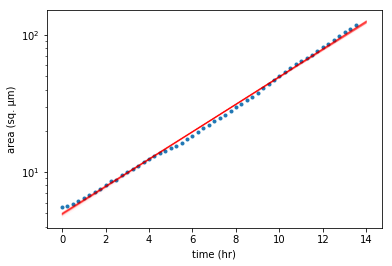

In [41]:
# Plot data points in a semilog-y plot with axis labeles
_ = plt.semilogy(t, bac_area, marker='.', linestyle='none')

# Generate x-values for the bootstrap lines: t_bs
t_bs = np.array([0, 14])

# Plot the first 100 bootstrap lines
for i in range(100):
    y = np.exp(growth_rate_bs_reps[i] * t_bs + log_a0_bs_reps[i])
    _ = plt.semilogy(t_bs, y, linewidth=0.5, alpha=0.05, color='red')
    
# Label axes and show plot
_ = plt.xlabel('time (hr)')
_ = plt.ylabel('area (sq. µm)')
plt.show()


You can see that the bootstrap replicates do not stray much. This is due to the exquisitly exponential nature of the bacterial growth under these experimental conditions.